# Unsupervised Machine Learning Model For Clustering Phshing Emails

## Dependencies Installation

In [16]:
%pip install numpy
%pip install pandas
%pip install joblib
%pip install matplotlib
%pip install seaborn
%pip install scikit-learn
%pip install scipy
%pip install jupyter
%pip install nltk
%pip install num2words
%pip install spacy
%pip install wordcloud
!python -m spacy download en_core_web_sm

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     -------------------------------- ------ 10.7/12.8 MB 57.0 MB/s eta 0:00:01
     ---------------------------------------- 12.8/12.8 MB 54.0 MB/s  0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


## Dependencies Import

In [17]:
import numpy as np
import pandas as pd

from joblib import dump, load

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.pipeline import Pipeline

from sklearn.base import BaseEstimator, TransformerMixin

import scipy.stats as stats
from sklearn.cluster import KMeans
from sklearn.cluster import HDBSCAN

from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.metrics import pairwise_distances

from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D # for 3D plots

from sklearn.feature_extraction.text import CountVectorizer
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
import re
import num2words

import spacy
import sys
!{sys.executable} -m spacy download en_core_web_sm
nlp = spacy.load("en_core_web_sm")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\usuario\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


  Using cached https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-3.8.0/en_core_web_sm-3.8.0-py3-none-any.whl (12.8 MB)
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


## 1. Data Load

In [18]:
data = "./data/model_data.csv"

emails = pd.read_csv(data, sep=",", encoding="UTF-8")

df_emails = emails.copy()

df_emails.shape

(39154, 7)

In [19]:
df_emails.sample(5)

,sender,receiver,date,subject,body,label,urls
23295,Alyssa Funk <CeceliadenturePainter@fluendo.com>,user2.15@gvc.ceas-challenge.cc,"Thu, 07 Aug 2008 11:15:52 +0000",asceticism assume backbone examination deaf,"\ncaine backbone backbone? ponder, insoluble p...",1,0
11679,julius penny <collegeresume@ms34.hinet.net>,user2.11@gvc.ceas-challenge.cc,"Wed, 06 Aug 2008 10:08:40 +0000",Find out incredible lovers' secret.,\nDear 59cb64d28d4be547075e24c8c23fe76e\n\nSum...,1,0
4360,"""\\""Martin v. Löwis\\"""" <qpnysl@v.loewis.de>",Christian Heimes <xhbdpodov@cheimes.de>,"Wed, 06 Aug 2008 04:50:37 +0100",Re: [Python-3000] [Python-Dev] Python 2.6 and 3.0,> The Windows builds are hidden in the develop...,0,1
9323,Head of Killer Deals <snvggqfydpipuccfs@bondan...,user2.2@gvc.ceas-challenge.cc,"Wed, 06 Aug 2008 20:51:51 +1300",20% off Sony,Your email client cannot read this email. To v...,0,1
16970,Frederick Powell <Frederick@informatik.fh-augs...,user2.1-ext1@gvc.ceas-challenge.cc,"Thu, 07 Aug 2008 16:13:44 +0200",Enhance your masculine power,Suffering 'cuz girls back away from your small...,1,1


In [20]:
df_emails.dtypes

sender      object
receiver    object
date        object
subject     object
body        object
label        int64
urls         int64
dtype: object

## 2. Data Understanding

In [21]:
df_emails.describe()

,label,urls
count,39154.000000,39154.00000
mean,0.557848,0.66997
std,0.496649,0.47023
min,0.000000,0.00000
25%,0.000000,0.00000
50%,1.000000,1.00000
75%,1.000000,1.00000
max,1.000000,1.00000


### Data Emptyness

In [22]:
df_percentages = (100*df_emails.isna().sum()/len(df_emails)).to_frame()
df_percentages.sort_values(0, ascending = False)

,0
receiver,1.179956
subject,0.071512
sender,0.000000
date,0.000000
body,0.000000
label,0.000000
urls,0.000000


### Data Duplicates

In [23]:
df_duplicated = df_emails.loc[df_emails.duplicated(keep=False)]
df_duplicated

,sender,receiver,date,subject,body,label,urls


### WordCloud

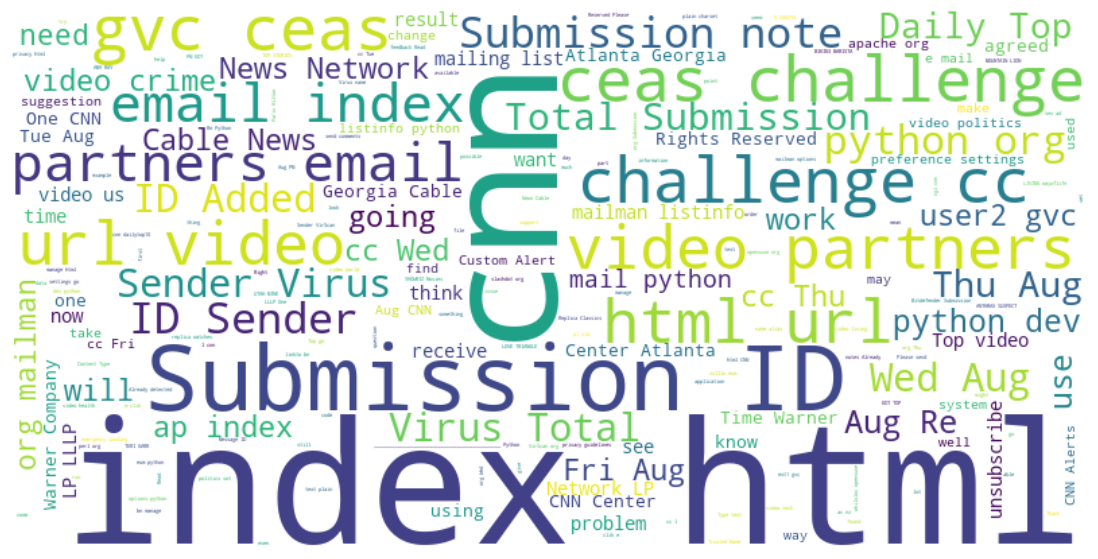

In [24]:
from wordcloud import WordCloud, STOPWORDS

text = " ".join(df_emails.select_dtypes(include='object').fillna('').agg(' '.join, axis=1))

wordcloud = WordCloud(stopwords=STOPWORDS, width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## 3. Data Transformations

### Drop Empty & Duplicates

In [25]:
def drop_empty(dataframe):

    dataframe.dropna(inplace=True)

    return

drop_empty(df_emails)

df_emails.shape

(38669, 7)

In [26]:
def drop_duplicates(dataframe):

    dataframe.drop_duplicates(inplace=True)

    return

drop_duplicates(df_emails)
df_emails.shape

(38669, 7)

### Drop Unecessary Columns

In [27]:
df_emails.drop(columns=["date", "label"], inplace=True)

### Text Transformations

In [28]:
def clean_ascii(df_emails):
    df_emails["sender"] = df_emails["sender"].apply(lambda x: x.encode("ascii", "ignore").decode() if isinstance(x, str) else x)
    df_emails["receiver"] = df_emails["receiver"].apply(lambda x: x.encode("ascii", "ignore").decode() if isinstance(x, str) else x)
    df_emails["subject"] = df_emails["subject"].apply(lambda x: x.encode("ascii", "ignore").decode() if isinstance(x, str) else x)
    df_emails["body"] = df_emails["body"].apply(lambda x: x.encode("ascii", "ignore").decode() if isinstance(x, str) else x)

    return

def clean_upper_case(df_emails):
    df_emails["sender"] = df_emails["sender"].str.lower()
    df_emails["receiver"] = df_emails["receiver"].str.lower()
    df_emails["subject"] = df_emails["subject"].str.lower()
    df_emails["body"] = df_emails["body"].str.lower()

    return

def clean_punctuation(df_emails):
    df_emails["sender"] = df_emails["sender"].apply(lambda x: re.sub(r'[.:,;-_¿?¡!"\'()\[\]{}\/%\$@+*\^]', '', x))
    df_emails["receiver"] = df_emails["receiver"].apply(lambda x: re.sub(r'[.:,;-_¿?¡!"\'()\[\]{}\/%\$@+*\^]', '', x))
    df_emails["subject"] = df_emails["subject"].apply(lambda x: re.sub(r'[.:,;-_¿?¡!"\'()\[\]{}\/%\$@+*\^]', '', x))
    df_emails["body"] = df_emails["body"].apply(lambda x: re.sub(r'[.:,;-_¿?¡!"\'()\[\]{}\/%\$@+*\^]', '', x))

    return

def clean_numbers(df_emails):
    df_emails["sender"] = df_emails["sender"].apply(lambda x: re.sub(r'\b\d+\b', lambda y: num2words.num2words(y.group(), lang='en'), x))
    df_emails["receiver"] = df_emails["receiver"].apply(lambda x: re.sub(r'\b\d+\b', lambda y: num2words.num2words(y.group(), lang='en'), x))
    df_emails["subject"] = df_emails["subject"].apply(lambda x: re.sub(r'\b\d+\b', lambda y: num2words.num2words(y.group(), lang='en'), x))
    df_emails["body"] = df_emails["body"].apply(lambda x: re.sub(r'\b\d+\b', lambda y: num2words.num2words(y.group(), lang='en'), x))

    return

def clena_stopwords(df_emails):
    stop_words = set(stopwords.words('english'))

    df_emails["sender"] = df_emails["sender"].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))
    df_emails["receiver"] = df_emails["receiver"].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))
    df_emails["subject"] = df_emails["subject"].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))
    df_emails["body"] = df_emails["body"].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))

    return

def clean_sidebar(df_emails):
    df_emails["sender"] = df_emails["sender"].apply(lambda x: x.replace("-", " "))
    df_emails["receiver"] = df_emails["receiver"].apply(lambda x: x.replace("-", " "))
    df_emails["subject"] = df_emails["subject"].apply(lambda x: x.replace("-", " "))
    df_emails["body"] = df_emails["body"].apply(lambda x: x.replace("-", " "))

    return

numbers_post_ascii = r'[0123456789]'

def clean_numbers_post_ascii(df_emails):
    df_emails["sender"] = df_emails["sender"].apply(lambda x: re.sub(numbers_post_ascii, '', x))
    df_emails["receiver"] = df_emails["receiver"].apply(lambda x: re.sub(numbers_post_ascii, '', x))
    df_emails["subject"] = df_emails["subject"].apply(lambda x: re.sub(numbers_post_ascii, '', x))
    df_emails["body"] = df_emails["body"].apply(lambda x: re.sub(numbers_post_ascii, '', x))

    return


In [29]:
def clean_text(df_emails):

    clean_ascii(df_emails)
    clean_upper_case(df_emails)
    clean_punctuation(df_emails)
    clean_numbers(df_emails)
    clena_stopwords(df_emails)
    clean_sidebar(df_emails)
    clean_numbers_post_ascii(df_emails)

    return

clean_text(df_emails)
print(df_emails)

                                                  sender  \
0                           young esposito youngiworldde   
1                                    mok iplinesicableph   
2      daily top ten karmandeep opengevluniversalnetp...   
3                         michael parker ivqrnaipoboxcom   
4           gretchen suggs externalseploanofficertoolcom   
...                                                  ...   
39149        cnn alerts charlene detectonbtcmarketingcom   
39150                   cnn alerts idgetilycareplusnjorg   
39151                       abhijit vyas xpojhbzgmailcom   
39152                  joseph brennan vupzesmcolumbiaedu   
39153                    christian heimes wluhecheimesde   

                                        receiver  \
0                        usergvcceas challengecc   
1                        usergvcceas challengecc   
2                        usergvcceas challengecc   
3      spamassassin dev xrhspamassassinapacheorg   
4                  

### Embeddings

In [30]:
def get_email_embeddings(df_emails, nlp):
    texts = df_emails[["sender", "receiver", "subject", "body", "urls"]].astype(str).agg(' '.join, axis=1)
    embeddings = np.array([doc.vector for doc in nlp.pipe(texts, batch_size=50)])
    return embeddings

In [32]:
clean_text(df_emails)

X = get_email_embeddings(df_emails, nlp)
print(X.shape)

(38669, 96)


## 4. Model